In [5]:
# Import NumPy and scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [13]:
weights = np.arange(0, 1.1, 0.1)


In [27]:
weight_fuzzy = fuzz.trimf(weights, [0, 0.5, 1])

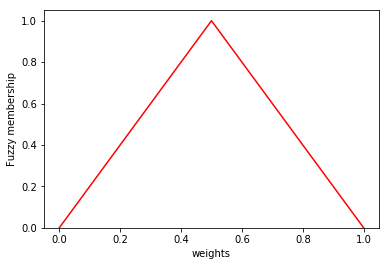

In [28]:
fig, ax = plt.subplots()

ax.plot(weights, weight_fuzzy, 'r')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('weights')
ax.set_ylim(0, 1.05);

In [122]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
#!pip install pillow
from PIL import Image
#import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
from tensorflow.examples.tutorials.mnist import input_data

#Loading in the mnist data
mnist = input_data.read_data_sets("/home/sidjarvis10/anaconda3/lib/python3.6/site-packages/tensorflow/examples/tutorials/mnist", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images,\
    mnist.test.labels

Extracting /home/sidjarvis10/anaconda3/lib/python3.6/site-packages/tensorflow/examples/tutorials/mnist/train-images-idx3-ubyte.gz
Extracting /home/sidjarvis10/anaconda3/lib/python3.6/site-packages/tensorflow/examples/tutorials/mnist/train-labels-idx1-ubyte.gz
Extracting /home/sidjarvis10/anaconda3/lib/python3.6/site-packages/tensorflow/examples/tutorials/mnist/t10k-images-idx3-ubyte.gz
Extracting /home/sidjarvis10/anaconda3/lib/python3.6/site-packages/tensorflow/examples/tutorials/mnist/t10k-labels-idx1-ubyte.gz


In [134]:
vb = tf.placeholder("float", [784])
a1 = tf.placeholder("float", [784])
a2 = tf.placeholder("float", [500])
hb = tf.placeholder("float", [500])
vb_l = tf.placeholder("float", [784])
hb_l = tf.placeholder("float", [500])
vb_r = tf.placeholder("float", [784])
hb_r = tf.placeholder("float", [500])

In [135]:
W = tf.placeholder("float", [784, 500])
a = tf.placeholder("float", [784, 500])
W_l = tf.placeholder("float", [784, 500])
W_r = tf.placeholder("float", [784, 500])

In [136]:
X = tf.placeholder("float", [None, 784])
_h0_l = tf.nn.sigmoid(tf.matmul(X, W_l) + hb_l)  #probabilities of the hidden units
_h0_r = tf.nn.sigmoid(tf.matmul(X, W_r) + hb_r)
h0_l = tf.nn.relu(tf.sign(_h0_l - tf.random_uniform(tf.shape(_h0_l)))) #sample_h_given_X
h0_r = tf.nn.relu(tf.sign(_h0_r - tf.random_uniform(tf.shape(_h0_r)))) #sample_h_given_X

In [137]:
_v1_l = tf.nn.sigmoid(tf.matmul(h0_l, tf.transpose(W_l)) + vb_l)
_v1_r = tf.nn.sigmoid(tf.matmul(h0_r, tf.transpose(W_r)) + vb_r) 
v1_l = tf.nn.relu(tf.sign(_v1_l - tf.random_uniform(tf.shape(_v1_l)))) #sample_v_given_h
v1_r = tf.nn.relu(tf.sign(_v1_r - tf.random_uniform(tf.shape(_v1_r)))) #sample_v_given_h
h1_l = tf.nn.sigmoid(tf.matmul(v1_l, W_l) + hb_l)
h1_r = tf.nn.sigmoid(tf.matmul(v1_r, W_r) + hb_r)


In [138]:
alpha = 1.0
w_pos_grad_l = tf.matmul(tf.transpose(X), h0_l)
w_neg_grad_l = tf.matmul(tf.transpose(v1_l), h1_l)

w_pos_grad_r = tf.matmul(tf.transpose(X), h0_r)
w_neg_grad_r = tf.matmul(tf.transpose(v1_r), h1_r)

CD_l = (w_pos_grad_l - w_neg_grad_l) / tf.to_float(tf.shape(X)[0])
CD_r = (w_pos_grad_r - w_neg_grad_r) / tf.to_float(tf.shape(X)[0])

update_w_l = W_l + alpha * CD_l
update_vb_l = vb_l + alpha * tf.reduce_mean(X - v1_l, 0)
update_hb_l = hb_l + alpha * tf.reduce_mean(h0_l - h1_l, 0)

update_w_r = W_r + alpha * CD_r
update_vb_r = vb_r + alpha * tf.reduce_mean(X - v1_r, 0)
update_hb_r = hb_r + alpha * tf.reduce_mean(h0_r - h1_r, 0)

In [152]:
err1 = tf.reduce_mean(tf.square(X - v1_l))
err2 = tf.reduce_mean(tf.square(X - v1_r))
err3= err1 + err2
cur_w_l = np.zeros([784, 500], np.float32)
cur_w_r = np.ones([784, 500], np.float32)
cur_vb_l = np.zeros([784], np.float32)
cur_vb_r = np.ones([784], np.float32)
cur_hb_l = np.zeros([500], np.float32)
cur_hb_r = np.ones([500], np.float32)
prv_w_l = np.zeros([784, 500], np.float32)
prv_w_r = np.ones([784, 500], np.float32)
prv_vb_l = np.zeros([784], np.float32)
prv_vb_r = np.ones([784], np.float32)
prv_hb_l = np.zeros([500], np.float32)
prv_hb_r = np.ones([500], np.float32)
#a=tf.div((tf.add(prv_w_l, prv_w_r)), 2)
#a1=tf.div((tf.add(prv_vb_l , prv_vb_r)), 2)
#a2=tf.div((tf.add(prv_hb_l , prv_hb_r)),2)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [154]:
print(sess.run(err1, feed_dict={X: trX, W_l: prv_w_l , vb_l: prv_vb_l , hb_l: prv_hb_l}))
print(sess.run(err2, feed_dict={X: trX, W_r: prv_w_r , vb_r: prv_vb_r , hb_r: prv_hb_r}))



0.48152158
0.8500987


Epoch: 0 reconstruction error for 1: 0.043299
Epoch: 0 reconstruction error for 2: 0.096744
Epoch: 1 reconstruction error for 1: 0.043387
Epoch: 1 reconstruction error for 2: 0.095535
Epoch: 2 reconstruction error for 1: 0.042483
Epoch: 2 reconstruction error for 2: 0.093774
Epoch: 3 reconstruction error for 1: 0.042853
Epoch: 3 reconstruction error for 2: 0.091861
Epoch: 4 reconstruction error for 1: 0.042395
Epoch: 4 reconstruction error for 2: 0.090170
Epoch: 5 reconstruction error for 1: 0.042316
Epoch: 5 reconstruction error for 2: 0.088442
Epoch: 6 reconstruction error for 1: 0.042104
Epoch: 6 reconstruction error for 2: 0.086143
Epoch: 7 reconstruction error for 1: 0.042070
Epoch: 7 reconstruction error for 2: 0.084092
Epoch: 8 reconstruction error for 1: 0.041670
Epoch: 8 reconstruction error for 2: 0.082638
Epoch: 9 reconstruction error for 1: 0.041488
Epoch: 9 reconstruction error for 2: 0.080444
Epoch: 10 reconstruction error for 1: 0.042181
Epoch: 10 reconstruction error fo

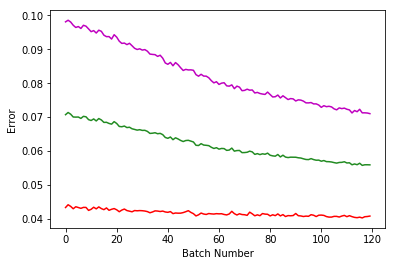

In [182]:
#Parameters
epochs = 20
batchsize = 100
weights = []
errors1 = []
errors2 = []
errors3=[]

for epoch in range(epochs):
    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w_l = sess.run(update_w_l, feed_dict={ X: batch, W_l: prv_w_l, vb_l: prv_vb_l, hb_l: prv_hb_l})
        cur_vb_l = sess.run(update_vb_l, feed_dict={  X: batch, W_l: prv_w_l, vb_l: prv_vb_l, hb_l: prv_hb_l})
        cur_hb_l = sess.run(update_hb_l, feed_dict={ X: batch, W_l: prv_w_l, vb_l: prv_vb_l, hb_l: prv_hb_l})
        cur_w_r = sess.run(update_w_r, feed_dict={ X: batch, W_r: prv_w_r, vb_r: prv_vb_r, hb_r: prv_hb_r})
        cur_vb_r = sess.run(update_vb_r, feed_dict={  X: batch, W_r: prv_w_r, vb_r: prv_vb_r, hb_r: prv_hb_r})
        cur_hb_r = sess.run(update_hb_r, feed_dict={ X: batch, W_r: prv_w_r, vb_r: prv_vb_r, hb_r: prv_hb_r})
        
        prv_w_l = cur_w_l
        prv_vb_l = cur_vb_l
        prv_hb_l = cur_hb_l
        
        prv_w_r = cur_w_r
        prv_vb_r = cur_vb_r
        prv_hb_r = cur_hb_r
        if start % 10000 == 0:
            errors1.append(sess.run(err1, feed_dict={X: trX, W_l: cur_w_l, vb_l: cur_vb_l, hb_l: cur_hb_l}))
            #weights.append(cur_w)
            errors2.append(sess.run(err2, feed_dict={X: trX, W_r: cur_w_r, vb_r: cur_vb_r, hb_r: cur_hb_r}))
            #weights.append(cur_w)
    print ('Epoch: %d' % epoch,'reconstruction error for 1: %f' % errors1[-1])
    print ('Epoch: %d' % epoch,'reconstruction error for 2: %f' % errors2[-1])
print(np.shape(errors1))    
errors3 = np.divide((np.add(errors1 , errors2)),2)
plt.plot(errors1,'r')
plt.plot(errors2, 'm')
plt.plot(errors3, 'ForestGreen')
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()